<a href="https://colab.research.google.com/github/franpanteli/Python-Machine-Learning-Cat-Dog-Image-Classifier/blob/main/Copy_of_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containng both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*



---



For this challenge, you will complete the code below to classify images of dogs and cats. You will use Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

You can tweak epochs and batch size if you like, but it is not required.

In [1]:
"""
-> This task is found at
          https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/cat-and-dog-image-classifier
					-> These are notes on the task description found at that URL
-> Google Colaboratory -> Copy the notebook; this is the starter code
	-> They want you to submit a Google Colaboratory link, which is the submission for the project
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> And there is starter code for this
	-> Keras and TensorFlow
	-> There are instructions in each of the code cells:
		-> Importing the libraries
		-> Downloading the data, setting key variables
		-> Then writing your own code
	-> Epochs
		-> You can change the number of epochs, but this isn't required
		-> An epoch is the number of times the same piece of data is gone over when training the model
-> You have to submit your project link
-> Classifying images of dogs and cats
	-> The model has to have a 63% or higher accuracy rate
	-> The test directory has no subdirectories, and the images aren't labeled
		-> Meaning unsupervised learning (?)
-> Each of the cells has its own instructions
"""

# Importing modules -> We are using TensorFlow to train the model - this was explained in the first half of the course content
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# cell 2 <- this entire cell is importing in the files and initialising the values of parameters which we will use when training the model
# Get project files
    # import the file with the training images
    # we are importing the data (image files) after submitting an https request
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

    # unzip it
!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

    # set the paths to the training files
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

Now it is your turn! Set each of the variables below correctly. (They should no longer equal `None`.)

Create image generators for each of the three image data sets (train, validation, test). Use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the `*_data_gen` variables, use the `flow_from_directory` method. Pass in the batch size, directory, target size (`(IMG_HEIGHT, IMG_WIDTH)`), class mode, and anything else required. `test_data_gen` will be the trickiest one. For `test_data_gen`, make sure to pass in `shuffle=False` to the `flow_from_directory` method. This will make sure the final predictions stay is in the order that our test expects. For `test_data_gen` it will also be helpful to observe the directory structure.


After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

In [3]:
"""
	-> Cell 3 <- Loading the image datasets (train, validate, test), with image generators -> processing that data into
							tensors and normalising it
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> The variables shouldn't equal none anymore
		-> There are three image datasets -> train, validation, test
			-> We have data and it's split into train, validate, and test
		-> Create image generators for each of these
			-> Once we split the data into train, validate, and test, we use ImageDataGenerator to process them
			-> We are converting the image from an image into a tensor
			-> This tensor is what we do the maths on
			-> Then rescale to normalise them
		-> We are taking the images, converting them into tensors using ImageDataGenerator, and then normalising their values
					using rescale
		-> For the *_data_gen variables
			-> Use the flow_from_directory method
			-> Passing in the arguments
				-> Batch size
				-> Directory
				-> Target size <- (IMG_HEIGHT, IMG_WIDTH)
				-> Class mode
			-> The values which the model is trained on
		-> For test_data_gen
			-> The flow_from_directory method should have shuffle=False <- It's not shuffling the predictions which the model
						comes out with, so the test knows which order to expect them in
			-> The values which the trained model is tested on
			-> The directory structure follows a specific format
		-> This entire cell is about taking the image data, splitting it into train, validate, test and then formatting it
					so that the images are normalised tensors, which can be processed
		-> We are moving the images into tensors with floating point numbers
"""

#normalising the tensors (higher dimensional matrices / vectors) which represent the images
	# -> ImageDataGenerator is the function which converts the image into a tensor (vector / matrix) <- this is from the keras module
			# -> you load in the images, and then keras converts them into a tensor (numbers which we can proccess) using this method
	# -> and we are normalising them at the same time <- the previous value of those tensors was between 0 and 255
  # -> we are repeating this process - once for train, once for validate and once for test data
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

#creating image generators for the image datasets -> train
	# -> keras is also used here to convert the image files into different datasets -> .flow_from_directory is a method from the keras module
			# and we are using it here to split the dataset of images into train, validate and test datasets
				# -> after they have first been converted into tensors (by ImageDataGenerator, which is part of keras)
train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

#creating image generators for the image datasets -> validate
	# -> notice how many of the arguments which we are passing into the flow_from_directory method were defined in the second code
				# cell of the notebook
val_data_gen   = validation_image_generator.flow_from_directory(
                    validation_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

#creating image generators for the image datasets -> test
	# -> shuffling is set to false for the test data -> but not for the other two datasets
	# -> we are splitting the larger dataset into three smaller ones
	# -> by turning off shuffle, we are making sure the predictions stay in the order which the test expects
test_data_gen  = test_image_generator.flow_from_directory(
                    PATH,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    classes=['test'],
                    shuffle=False)

# -> The previous cell is importing the image dataset to use
# -> This cell is normalizing the tensors that represent those images
# -> Then we are splitting that data into three datasets -> train, validate, and test
# -> We are fitting the model on one, validating it on the other to see if it was overfit, and then testing the trained model on the third

"""
The output from this cell is supposed to be:
	Found 2000 images belonging to 2 classes.
	Found 1000 images belonging to 2 classes.
	Found 50 images belonging to 1 classes.
"""

"""
In keras
	-> ImageDataGenerator <- we are using this method to generate data (tensors) from the images which are loaded into it
			-> we are normalising this data as well -> if the magnitude of the tensors is too large then it could blow up the model
	-> flow_from_directory <- we are using this method to split the dataset (in tensor form) into test, train and validate datasets
"""

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


'\nIn keras \n\t-> ImageDataGenerator <- we are using this method to generate data (tensors) from the images which are loaded into it \n\t\t\t-> we are normalising this data as well -> if the magnitude of the tensors is too large then it could blow up the model \n\t-> flow_from_directory <- we are using this method to split the dataset (in tensor form) into test, train and validate datasets \n'

The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

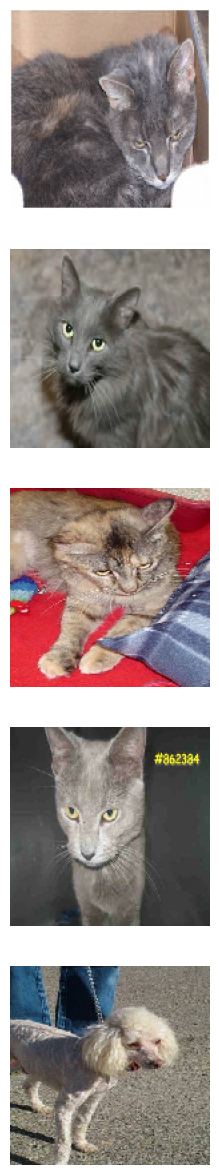

In [4]:
#This one contains a function which goes from image in tensor form to image in visual form
  #-> The previous cell went from image in visual form to image in tensor form using keras
"""
	-> Cell 4 <- Contains a function to go from images in tensor form back to actual images
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> plotImages <- This is a function which takes an array of numbers (tensor) and outputs the image which they represent
		-> It also takes a probability list
		-> In the starter code, it creates 5 random training images
		-> This cell essentially goes from
"""

"""
-> Defining the plotImages function
    -> We have three datasets of images in tensor form -> these were derived using Keras in the previous cell
    -> We are now defining a function which can convert these images in tensor form back into image files
    -> One which can output / plot those images
    -> We are feeding it an array of images, and it is plotting them into image files
    -> It takes an array and a probability list
    -> This code is given to us
"""

#defining the funciton
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

#testing the function on the training dataset
"""
  How this is done/ context:
  -> The previous cell took the images and used keras to convert them into normalised tensors
  -> Then split them into test, training and validation datasets
  -> The code below is taking the plotImages function which was defined above and using the test images dataset in tensor form
      -> It is taking this array of tensors and converting it back into images by plotting them
      -> We've used keras to go from image to tensor and now we are using this function to go from tensor back to image
      -> And are plotting those iamges to test the function
      -> So we can go from image to tensor using keras and from tensor to image using this function
      -> This is important because we need to see how well the model has worked by plotting the results
      -> But when the model is working on the images, it's using them in tensor form
"""

# This variable is storing the images we want to plot -> it is returning the next item in the sequence
  # -> it is fetching batches of data, one batch of data at a time -> to control the data flow
  # -> we aren't testing the function on the entire training dataset, we're testing it on one batch of data from that dataset
sample_training_images, _ = next(train_data_gen)
# We are plotting the last 5 images in that dataset
plotImages(sample_training_images[:5])

Recreate the `train_image_generator` using `ImageDataGenerator`.

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [5]:
"""
	-> Cell 5 <- This runs transformations on the training images so that they can be used to train the model, since we
								are trying to avoid overfitting and there is not enough training data in the model's dataset
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> Recreate the train_image_generator using ImageDataGenerator
		-> There is not enough training data
			-> Training the model on the same data runs the risk of overfitting it
			-> To get around this - creating more training data by taking the same image and transforming it multiple times
			-> Training it on the same image -> just transformed, because there aren't another images
			-> Random transformations of that same image
			-> 4-6 of these random transformations
		-> This file contains a function called ImageDataGenerator which takes the inputted images and transforms them
					multiple times
			-> So that these images can all be transformed and be used to train the data
			-> Transforming the same image and training the model on it because there isn't enough training data - and if the
						same image is used too many times then the model could be overfit
		-> The purpose of this cell is to create new data by transforming the same image used to train it -> so that the model
						isn't overfit
"""

"""
-> Train image generator is the Keras method we used to convert data into tensor form and create a dataset for
		training images
-> We aim to apply random transformations to images five times and then utilize these augmented images for dataset
		training
-> We do not use the images directly from the dataset to train the model; instead, we batch them into training,
		validation, and test datasets
-> The data used to train these models undergoes five transformations per image, providing five times the data to
		prevent overfitting
-> Our process involves taking images from the training dataset and applying various transformations
-> This process is what we refer to as 'creating more training data'
-> ImageDataGenerator, a Keras method, was previously employed to convert images into tensors and divide them into validation,
		training, and test datasets
-> Now, we use it to apply five transformations to images in the training dataset, which constitutes image data augmentation
-> The function's arguments for these transformations include:
  - Rescaling
  - Horizontal flipping
  - Rotation
  - Zooming
  - Shifting images by a fraction of the width or height
  - Sheer transformations
-> This method can be used to process data in batches, but in our case, we apply it to the entire training data at once
"""

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode='nearest')

You don't have to do anything for the next cell. `train_data_gen` is created just like before but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


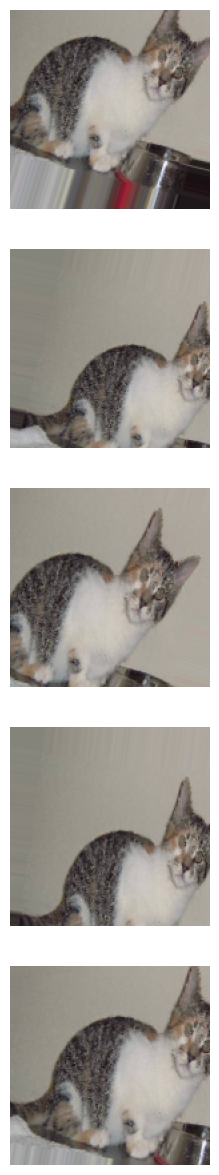

"\n-> The previous cell defined the generator using keras, which transformed the image files to do data augmentation on them \n-> This cell augments (transforms) the image files in the training dataset, to increase the amount of data in the set and avoid overfitting \n-> The last two lines of Python extracted the first image from this and plotted it out \n    -> By using plotImages -> which takes the image in tensor form and converts it into a visible image\n-> We have first loaded the data in image form, then converted it into tensor form using keras, then split it into test, train and validate datasets\n\t\t-> Then we defined a generator to transform the data in the training dataset to perform data augmentation \n\t\t-> This cell was using that generator to transform the images in the training dataset using this augmentation \n\t\t-> Then printing out one of those augmented images using the plotImages function to show what it's done to the data in the training dataset \n"

In [6]:
"""
	-> Cell 6 <- This cell transforms the same image five different times - to generate an image which is used to
								train the model (we are increasing the amount of training data in the model by 5x)
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> This cell is to be left alone
		-> The previous cell is taking images in the project dataset and transforming them to be used to train the model
		-> This cell is taking these data and running five random transformations on one image
		-> train_data_gen <- The training data is created, using the train_image_generator
		-> We are taking the data which the model is being trained on and transforming each image 5 times
			-> To increase the amount of images which we have to train the model on by 5x
		-> It's plotting a single image 5 times with different transformations
"""

"""
-> Train_image_generator is the generator defined in the previous cell, which takes the images and transforms them
-> This is to run augmentation on the training images in the dataset -> we are transforming them five times to increase
		the number of images in the training dataset
-> The previous cell was the one which defined the generator to transform these images in the training dataset
-> This cell is applying that generator to the train_data_gen images
-> We are transforming the training images five times using the generator defined in the previous code cell - doing data
		augmentation on them
-> Then we are using the plotting function to plot one example of them
"""

#train_image_generator is the generator which transforms the images -> to run data augmentation
#flow_from_directory is a keras method to do this
#this is doing this for all of the data in the dataset
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

#the code below is extracting an example to print out using the plotImages function -> which takes the images in tensor form
	# and prints them out in regular form
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

#this plots / outputs an example of one of them (the transformed images) -> in this case it's the same image 6 times
plotImages(augmented_images)

"""
-> The previous cell defined the generator using keras, which transformed the image files to do data augmentation on them
-> This cell augments (transforms) the image files in the training dataset, to increase the amount of data in the set and avoid overfitting
-> The last two lines of Python extracted the first image from this and plotted it out
    -> By using plotImages -> which takes the image in tensor form and converts it into a visible image
-> We have first loaded the data in image form, then converted it into tensor form using keras, then split it into test, train and validate datasets
		-> Then we defined a generator to transform the data in the training dataset to perform data augmentation
		-> This cell was using that generator to transform the images in the training dataset using this augmentation
		-> Then printing out one of those augmented images using the plotImages function to show what it's done to the data in the training dataset
"""

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

In [7]:
"""
	-> Cell 7 <- This cell initialises the architecture for the model (without training it)
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> Using the Keras Sequential model to initialise the architecture of the model we are going to use
		-> The output of the model
			-> We are predicting if the images are of dogs or cats
			-> These are two different classes
			-> The final layer of the network should involve a 1x2 array - whose values are the probabilities that the image is either of a dog or cat
			-> We are using a convolutional neural network -> this uses filters
			-> Then we choose the maximum value in that output array -> the one with the highest probability determines the classification of the image
			-> Because of this, we are also normalising the values of the probabilities in that network
		-> That the model architecture should include
			-> A stack of Conv2D and MaxPooling2D layers
			-> A fully connected layer
			-> Activated by ReLU activation function <- it's 1 or 0 (the neuron is on or it's off, it's like a diode but for a neuron)
				-> It's getting rid of all of the negative values and setting them to 0 - and leaving the rest of the values of the neuron the same
				-> Leave ReLU -> some negative values are allowed through (it's less harsh)
				-> We are using ReLU
			-> Optimiser and loss functions
			-> Metrics=['accuracy'] <- so we can see the training and validation accuracy for each of the training epochs
				-> For each time the model goes over the same piece of data to train it -> an epoch
				-> The model can overfit if this is done too many times - which is why we transform the same image five times in the training dataset
"""

"""
-> the aim of the model is to output the class probabilities
		-> we know that the image which is fead into it will either be of a dog or a cat
		-> we can store this in a 1x2 array
		-> one element represents the probability that the image is of a dog
		-> the other element represents the probability that the image is of a cat
		-> which means that we need to normalise them using a sigmoid activation funciton
		-> like a tanh funciton but between 0 and 1 (rather than -1 and 1)
		-> this is what we want the model to ouput -> so there will probably be two nodes at the end
			-> since we are dealing with two categories -> supervised learning (we are telling it what the categories are)
-> we are initialising the architecture of the model
		-> not actually training it (yet)
		-> we first import the data, get it into the right form -> then initialise the architecture of the model, train the model, use it
				to make predictions and test it to see how accurate they were
		-> we are using the Keras Sequential model to create this architecture
				-> each block represents a layer in the neural network
				-> each of the blocks is a layer in the network -> we are choosing the architecture of those layers and their activation functions
				-> the information is flowing sequentially through the layers
-> we are stacking Conv2D and MaxPooling2D layers and a fully connected layer with a ReLU activation function
		-> then compiling the model with the arguments to set the optimiser and loss
		-> we also want metrics=['accuracy'] to view the training and validation accuracy
		-> training epochs (each time the same peice of data is gone over to train the model on)
				-> and now we have engouh data because of the augmentation to avoid overfitting
"""

#initialise the neural network as an empty keras sequential model
model = Sequential()
# each of these lines is adding a layer to the neural network
"""
-> The architecture of the model:
	-> This is a Convolutional Neural Network (CNN), designed for image classification
	-> Conv2D: this is a convolutional layer with 32 filters of size (3,3) and utilises the ReLU activation function
	-> MaxPooling2D: Used to reduce the dimensions of matrices from the previous layer in the network
	-> This architecture is repeated:
		-> Convolutional layer: Scans images using filters
		-> Max pooling layer: Reduces the dimensions of the data
		-> This repetition occurs three times to capture deeper patterns
		-> ReLU activation function ensures positive outputs and zeros for negatives. Too many negative outputs can lead to issues
		-> Applied in the convolutional layers of the network
	-> Flattening layer: Converts the output of neurons into a 1-D layer. The goal is a 1D array of probabilities
	-> Densely connected layer of 64 neurons: Helps the model find more complex patterns in the data
	-> The final layer of the network adds another such layer:
		-> Sigmoid function is used to squash the output into probabilities
		-> ReLU activation functions are needed to eliminate negatives. In turning them into probabilities with sigmoid in the last
				layer, unless we get rid of the negatives using a ReLU in the layer before, this could cancel out some values we are
					using to calculate those probabilities with the sigmoid function in the next layer
		-> The final layer consists of a single neuron for binary classification tasks (checking if the image is of a dog or a cat)
	-> This entire architecture is designed for image classification tasks
"""

# Learning outputs
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

# Flattening this into a vector and single output for the network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# This line prints out a summary of the model's architecture
model.summary()

"""
-> We are defining the architecture of the model. Each layer we are adding is a new line of code
-> Then we are printing out a summary of that architecture
-> Now the line below is compiling the model:
    -> This tells it what to optimize for (the accuracy of the model)
    -> This is the loss function. Use this algorithm (Adam) to perform geometry optimization
-> Why we are using binary cross-entropy:
    -> This is the loss function that we are using
    -> We are using this because we only have two classes
    -> This measures the difference between the predicted and actual probability distribution
    -> Cross-entropy is telling you how well the predicted probability distribution matches the actual one
"""

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [8]:
"""
	-> Cell 8 <- Training the model
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> We first take the training data and put it into array format and make sure we have enough of it
		-> Then we initialize the architecture of the neural network
		-> Now we are training that network
			-> We are using the fit method
		-> This will require
			-> Arguments for
				-> x
				-> steps_per_epoch
				-> epochs
				-> validation_data
				-> validation_steps
"""

history = model.fit(train_data_gen,
                    steps_per_epoch=train_data_gen.n//train_data_gen.batch_size,
                    epochs=epochs, validation_data=val_data_gen,
                    validation_steps=val_data_gen.n//val_data_gen.batch_size)

"""
-> We have imported and formatted the data by dividing it into training, validation, and testing datasets
-> The previous cell set the architecture for the model
-> In this cell, we are training the model
-> Keras has a fit method to do this
-> The name_of_the_model.fit <- This is how Keras is used to train the model
-> The arguments for this method are
	-> x
	-> steps_per_epoch
	-> epochs
	-> validation_data
	-> validation_steps
-> We are setting this trained model equal to a variable called 'history'
-> The previous cell initialised the architecture of the neural network; this cell trains the neural network
			using the Keras fit method
-> To train models in Keras -> you use the fit method -> after initialising its architecture
-> The first argument when doing this is the training data -> we previously performed data augmentation for
		this, with the images in tensor form
-> Steps per epoch is the number of batches of data to process per epoch
	-> An epoch is one time the model is trained on the same piece of data
	-> This is the number of batches which that data is split into each time the model is trained on it
-> We are also giving it the validation data -> when the model is trained, we can use this data to validate
		its training
	-> Other arguments in this process are
			-> Training data <- to train the machine learning model
				-> This is the one the model adjusts its weights on
			-> Validation
				-> To make decisions about the model's architecture
			-> Test data
				-> To evaluate the performance of the trained model
			-> We are also telling it the number of steps to perform validation in -> how many batches we should put
					that data into during the training process - per epoch (one time the validation is gone over during training)
-> History is used to store the values which the model outputs during this training
-> The parameters need to be properly initialised because the model takes time to train -> you can also use a GPU in Colab
"""

Epoch 1/15
15/15 [==============================] - 117s 8s/step - loss: 0.7232 - accuracy: 0.5027 - val_loss: 0.6938 - val_accuracy: 0.4888
Epoch 2/15
15/15 [==============================] - 113s 7s/step - loss: 0.6937 - accuracy: 0.5101 - val_loss: 0.6895 - val_accuracy: 0.5558
Epoch 3/15
15/15 [==============================] - 113s 7s/step - loss: 0.6886 - accuracy: 0.5299 - val_loss: 0.6744 - val_accuracy: 0.6250
Epoch 4/15
15/15 [==============================] - 113s 7s/step - loss: 0.6704 - accuracy: 0.5775 - val_loss: 0.6382 - val_accuracy: 0.5871
Epoch 5/15
15/15 [==============================] - 120s 8s/step - loss: 0.6451 - accuracy: 0.6165 - val_loss: 0.6082 - val_accuracy: 0.6652
Epoch 6/15
15/15 [==============================] - 106s 7s/step - loss: 0.6224 - accuracy: 0.6512 - val_loss: 0.5795 - val_accuracy: 0.6741
Epoch 7/15
15/15 [==============================] - 117s 8s/step - loss: 0.5980 - accuracy: 0.6745 - val_loss: 0.5734 - val_accuracy: 0.6819
Epoch 8/15
15

"\n-> We have imported and formatted the data by dividing it into training, validation, and testing datasets\n-> The previous cell set the architecture for the model \n-> In this cell, we are training the model \n-> Keras has a fit method to do this \n-> The name_of_the_model.fit <- This is how Keras is used to train the model \n-> The arguments for this method are \n\t-> x\n\t-> steps_per_epoch\n\t-> epochs\n\t-> validation_data\n\t-> validation_steps\n-> We are setting this trained model equal to a variable called 'history'\n-> The previous cell initialised the architecture of the neural network; this cell trains the neural network \n\t\t\tusing the Keras fit method  \n-> To train models in Keras -> you use the fit method -> after initialising its architecture \n-> The first argument when doing this is the training data -> we previously performed data augmentation for \n\t\tthis, with the images in tensor form \n-> Steps per epoch is the number of batches of data to process per epoch

Run the next cell to visualize the accuracy and loss of the model.

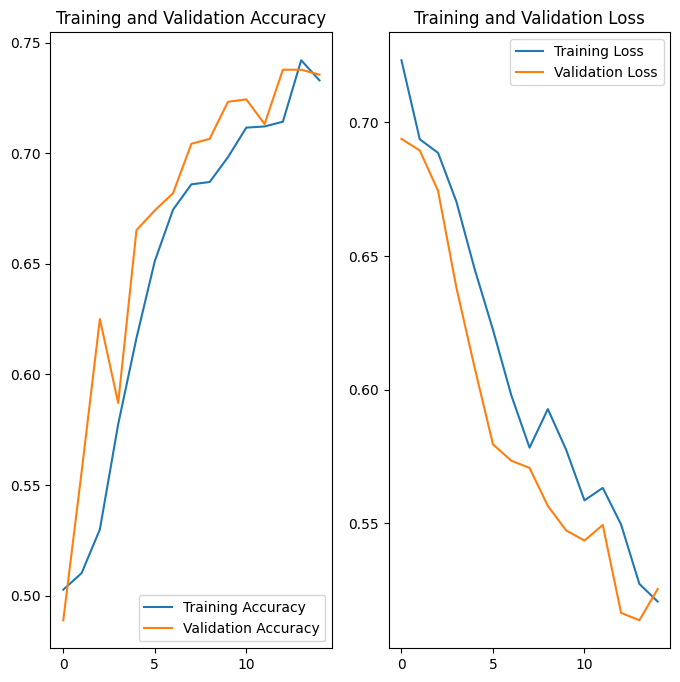

In [9]:
"""
	-> Cell 9 <- Outputs graphs about the accuracy and loss of the training model
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> The previous cell trains the model
		-> This cell is telling us about the performance of its loss function
		-> We are trying to maximize the accuracy of the function
			-> This is the same as trying to minimize the loss function by performing gradient descent
"""

# Extracting Metrics from History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Setting up Epochs Range
epochs_range = range(epochs)

# Creating a Figure
plt.figure(figsize=(8, 8))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Displaying the Plots
plt.show()

"""
		-> This entire cell creates plots which show how accurate the model is with the number of epochs used to
				train it
		-> This code is provided to us and we are using it to visualise the accuracy of the model after it's been
				trained
		-> This is both for the training and for the validation of the neural network
		-> History stores the trained model -> the first block of code in this cell extracts the different metrics
				from this (e.g the accuracy of the model and the loss function which we are going to use to make predictions with)
		-> We are then creating a range object for the number of epochs
			-> Each time the model is trained on the same piece of data, this is an epoch
			-> We are looking at the accuracy and loss function of the model and predicting how this changes with the amount
					of times we train the model on the same peice of data
			-> Too many times and we can overfit the data
			-> Not enough times and it won't be as accurate
		-> We are then creating the graphs to plot
			-> The first blocks of code in this cell are defining the arrays which we are going to plot
			-> The next is for creating these plots
			-> We are creating two subplots -> plotting the training and validation loss over epochs
			-> This is used to determine the architecture of the model which optimises the accuracy of its predictions
"""

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from `test_data_gen`) is a dog or a cat. `probabilities` should be a list of integers.

Call the `plotImages` function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

1/1 [==============================] - 1s 793ms/step


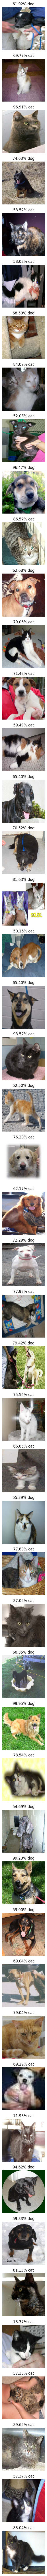

In [10]:
"""
	-> Cell 10 <- Using the model to make a prediction and seeing if it works
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> So we
			-> Put the data into a specific format
			-> Make sure there is enough of it
			-> Initialize the architecture of the model
			-> Train the model
		-> Now we are using the model to make predictions and see if they work
		-> We are predicting if the image is a cat or a dog
		-> There are 50 test images -> running this cell will output the accuracy of the model
			-> More training images mean the model will become more accurate
		-> test_data_gen <- This contains the test data
		-> The output of this model is a list of probabilities
		-> The plotImages function
			-> Passing the test images into this will give the probabilities for each of these images
			-> The probability each of those images is of a dog or a cat (how "sure" it is)
			-> Running this cell will do this with 50 test images
			-> This "sure" score corresponds to the accuracy of the model
			-> The previous cell output this accuracy for the entire model -> this does it for each of the pieces of test data in the model
"""

probabilities = model.predict(test_data_gen)[:,0]
plotImages(test_data_gen[0][0], probabilities)

"""
	-> Now we are using the model to make predictions
	-> We are taking the trained model and testing it on test data it hasn't seen before
	-> The validation data was to optimise the number of epochs and for the architecture of the model -> outputting graphs
				for these metrics and the performance of the model
	-> The model had been trained in the previous cell
		-> This outputs graphs which were used to validate it and the number of epochs used to train it
					-> Going over the same piece of data more than once when training the model makes it more accurate
	-> Now we have the trained model, we are using it to make predictions on the test data to see how accurate it is
	-> These are images of cats and dogs in tensor form -> which this cell runs the model on
	-> It hasn't seen these images before -> and it is predicting whether they are of cats or dogs
	-> We are running the model on an entire dataset of these files to make predictions
	-> Each prediction which it makes is a 1x1 array -> which is the probability that the image which has been passed through
				it in tensor form is a cat or dog
		-> test_data_gen is the array which contains this list of its probabilities / guesses for all 50 images in the dataset which are being passed
				through our model
	-> The plotImages function is then used to plot these images, which combines them with the predictions which the model makes
				about whether the image is of a dog or cat
		-> This takes both the predictions which the model output and the probabilities which correspond to each image
		-> There are 50 test images -> more training images could have been used to increase the accuracy of the model
		-> When the model is trained, it goes through (in this case) one batch of data and trains itself on it 15 times -> it does
				this for all of the data in the training dataset
			-> And you can see its accuracy as it trains -> too accurate and there may be overfitting because of an epoch count which is
					too high
"""

"""
	How this code works:
		-> There are two lines of code
				-> The first uses the trained model to make predictions using the Keras predict method
						-> This is done on the test images stored in test_data_gen
						-> We are then selecting the probability that the image is of a dog, by using [:,0]
						-> This is done for all 50 images in the test dataset and storing the output from each prediction in the array called probabilities
				-> The second line uses the plotting function to plot these probabilities (the predictions of the model on the training dataset), but
						for the first batch of training data
						-> This converts the tensors that represent those images back into visible images for the first 50 images
						-> We are doing this so we can visibly compare the predictions of the model to the images which it is trying to classify
"""

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [11]:
"""
	-> Cell 11 <- This cell runs tests on our solution to see if it works
	%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
		-> You can run this cell as many times as you want
		-> You may need to restart the code for the entire project to do this because of the kernel
    -> This cell iterates through the answers to see if the predictions from our model match it
        -> It is iterating through the list of probabilities which our model made and comparing them to what the actual
            answers should have been for that prediction
        -> Then if 63% or more of our predictions are correct, it's returning a certain message which says the model succeeded
        -> If otherwise, then it's returning another message which says the model failed
"""

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.76% of the images of cats and dogs.
You passed the challenge!
